## NIH Dataset

In [1]:
import os
import pandas as pd

nih_path = "/kaggle/input/data"
labels_path = os.path.join(nih_path, "Data_Entry_2017.csv")
df = pd.read_csv(labels_path)

# Number of images per folder (as per README)
folder_sizes = [4999] + [10000]*10 + [7121]
folder_names = [f"images_{i:03d}" for i in range(1, 13)]

# Compute cumulative limits
folder_ranges = []
start = 0
for folder, size in zip(folder_names, folder_sizes):
    end = start + size
    folder_ranges.append((folder, start, end))
    start = end

def get_image_path_by_index(idx, image_name):
    for folder, start, end in folder_ranges:
        if start <= idx < end:
            return os.path.join(nih_path, folder, "images", image_name)
    return None

# Apply function
df["Image Path"] = [
    get_image_path_by_index(i, name) for i, name in enumerate(df["Image Index"])
]

print(df.head())
print(df["Image Path"].iloc[0])


        Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_000.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           58              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           81              M            PA                 2500     2048   
4           81              F            PA                 2582     2991   

   OriginalImagePixelSpacing[x     y]  Unnamed: 11  \
0                        0.143  0.143          NaN

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [2]:
test_img = "00028173_002.png"
row = df[df["Image Index"] == test_img].index[0]
print(get_image_path_by_index(row, test_img))
print(row)

/kaggle/input/data/images_011/images/00028173_002.png
104998


In [3]:
df.iloc[104998]

Image Index                                                     00028173_002.png
Finding Labels                                                        No Finding
Follow-up #                                                                    2
Patient ID                                                                 28173
Patient Age                                                                   16
Patient Gender                                                                 F
View Position                                                                 AP
OriginalImage[Width                                                         3056
Height]                                                                     2544
OriginalImagePixelSpacing[x                                                0.139
y]                                                                         0.139
Unnamed: 11                                                                  NaN
Image Path                  

In [4]:
df.tail()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,Image Path
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN,/kaggle/input/data/images_012/images/00030801_...
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN,/kaggle/input/data/images_012/images/00030802_...
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN,/kaggle/input/data/images_012/images/00030803_...
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN,/kaggle/input/data/images_012/images/00030804_...
112119,00030805_000.png,No Finding,0,30805,27,M,PA,2048,2500,0.171,0.171,NaN,/kaggle/input/data/images_012/images/00030805_...


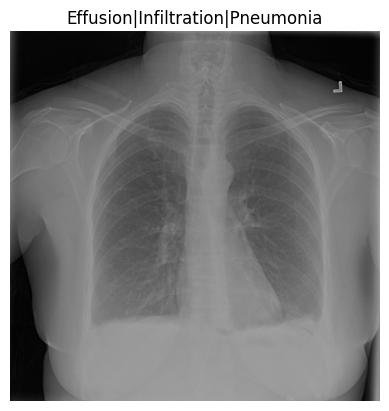

In [5]:
import matplotlib.pyplot as plt
import cv2

img_name = "00029747_002.png"
img_path = "/kaggle/input/data/images_012/images/00029747_002.png"
row = df[df["Image Index"] == img_name].index[0]
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title(df.iloc[row]["Finding Labels"])
plt.axis("off")
plt.show()

In [ ]:
target_labels = ["Pneumonia", "Cardiomegaly", "Effusion", "No Finding"]

# Keep only rows with any of the 4 target findings
nih_df = df[df["Finding Labels"].str.contains("|".join(target_labels))].copy()

# --- Map to final 4-class labels ---
def map_label(x):
    if "Pneumonia" in x:
        return "Pneumonia"
    elif "Cardiomegaly" in x:
        return "Cardiomegaly"
    elif "Effusion" in x:
        return "Pleural Effusion"
    elif "No Finding" in x:
        return "Normal"
    else:
        return None

nih_df["label"] = nih_df["Finding Labels"].apply(map_label)
nih_df = nih_df.dropna(subset=["label"])

# --- Apply correct path mapping based on row index ---
nih_df["Image Path"] = [
    get_image_path_by_index(i, name) for i, name in zip(nih_df.index, nih_df["Image Index"])
]

# Show preview
nih_df.head()

In [ ]:

print("\nTotal samples:", len(nih_df))
print("\nSample image path:", nih_df["Image Path"].iloc[0])

In [ ]:
nih_df.rename(columns={"Image Path": "image_path"}, inplace=True)

In [ ]:
print("Class distribution:\n", nih_df["label"].value_counts())

## Covid Dataset

In [5]:
import os
import pandas as pd

def load_covid_split(txt_file, base_path="/kaggle/input/covidx-cxr2/train.txt"):
    rows = []
    with open(txt_file, "r") as f:
        for line in f.readlines():
            parts = line.strip().split()
            img_path = os.path.join(base_path, parts[1])
            label = parts[2].lower()
            
            if label == "positive":
                rows.append([img_path, "COVID-19"])
            elif label == "negative":
                rows.append([img_path, "Normal"])
            elif label == "pneumonia":
                rows.append([img_path, "Pneumonia"])
    
    return pd.DataFrame(rows, columns=["image_path", "label"])

# ✅ Use only train set
covid_train = load_covid_split("/kaggle/input/covidx-cxr2/train.txt", base_path="/kaggle/input/covidx-cxr2/train/")

# ✅ Combine only train data (no val/test)
covid_df = covid_train.copy()

print("COVIDx class distribution:\n", covid_df["label"].value_counts())
covid_df.head()


COVIDx class distribution:
 label
COVID-19    57199
Normal      10664
Name: count, dtype: int64


,image_path,label
0,/kaggle/input/covidx-cxr2/train/1e64990d1b40c1...,Normal
1,/kaggle/input/covidx-cxr2/train/7223b8ad031187...,Normal
2,/kaggle/input/covidx-cxr2/train/3392dc7d262e28...,Normal
3,/kaggle/input/covidx-cxr2/train/ec3a480c0926de...,Normal
4,/kaggle/input/covidx-cxr2/train/a72aeb349a63c7...,Normal


In [6]:
print("COVIDx class distribution:\n", covid_df["label"].value_counts())

COVIDx class distribution:
 label
COVID-19    57199
Normal      10664
Name: count, dtype: int64


In [7]:
covid_df.tail()

,image_path,label
67858,/kaggle/input/covidx-cxr2/train/sub-S29624_ses...,Normal
67859,/kaggle/input/covidx-cxr2/train/sub-S29625_ses...,Normal
67860,/kaggle/input/covidx-cxr2/train/sub-S29626_ses...,Normal
67861,/kaggle/input/covidx-cxr2/train/sub-S29629_ses...,Normal
67862,/kaggle/input/covidx-cxr2/train/sub-S29630_ses...,Normal


In [8]:
covid_df['image_path'][60000]

'/kaggle/input/covidx-cxr2/train/sub-S326737_ses-E53636_run-1_bp-chest_vp-ap_cr-corrected.png'

In [10]:
covid_df.iloc[60000]

image_path    /kaggle/input/covidx-cxr2/train/sub-S326737_se...
label                                                  COVID-19
Name: 60000, dtype: object

In [9]:
covid_df['image_path'][6000]

'/kaggle/input/covidx-cxr2/train/fd060e38-c89d-4bef-b9aa-427a97a1cf9a.png'

In [11]:
covid_df.iloc[6000]

image_path    /kaggle/input/covidx-cxr2/train/fd060e38-c89d-...
label                                                    Normal
Name: 6000, dtype: object

In [16]:
covid_df['image_path'][600]

'/kaggle/input/covidx-cxr2/train/COVID(74).png'

In [17]:
covid_df.iloc[600]

image_path    /kaggle/input/covidx-cxr2/train/COVID(74).png
label                                              COVID-19
Name: 600, dtype: object

In [ ]:
import matplotlib.pyplot as plt
import cv2


img_path = '/kaggle/input/covidx-cxr2/train/sub-S326737_ses-E53636_run-1_bp-chest_vp-ap_cr-corrected.png'
row = covid_df[covid_df["image_path"] == img_path].index[0]

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title(covid_df.iloc[row]["label"])
plt.axis("off")
plt.show()

## Tuberculosis Dataset

In [ ]:
import glob
tb_data = []

# Montgomery TB
mont_path = "/kaggle/input/pulmonary-chest-xray-abnormalities/Montgomery/MontgomerySet/CXR_png"
for f in glob.glob(os.path.join(mont_path, "*.png")):
    tb_data.append([f, "Tuberculosis"])

# China TB
china_path = "/kaggle/input/pulmonary-chest-xray-abnormalities/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png"
for f in glob.glob(os.path.join(china_path, "*.png")):
    tb_data.append([f, "Tuberculosis"])

tb_df = pd.DataFrame(tb_data, columns=["image_path", "label"])
print("Tuberculosis samples:", len(tb_df))

In [ ]:
tb_df.head()

In [ ]:
tb_df["image_path"][110]

In [ ]:
import matplotlib.pyplot as plt
import cv2

img_path = '/kaggle/input/pulmonary-chest-xray-abnormalities/Montgomery/MontgomerySet/CXR_png/MCUCXR_0068_0.png'
row = tb_df[tb_df["image_path"] == img_path].index[0]
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title(tb_df.iloc[row]["label"])
plt.axis("off")
plt.show()

## Concatenated Dataset

In [ ]:
final_df = pd.concat([
    nih_df[["image_path", "label"]],
    covid_df,
    tb_df
], ignore_index=True)

print("Full dataset size:", len(final_df))
print("Class distribution:\n", final_df["label"].value_counts())

In [ ]:
final_df.head()

In [ ]:
import matplotlib.pyplot as plt

final_df["label"].value_counts().plot(kind="bar")
plt.title("Class Distribution (Before Balancing)")
plt.ylabel("Number of Samples")
plt.show()


## Balanced Dataset

In [ ]:
import numpy as np
from sklearn.utils import resample

balanced_dfs = []
target_size = 10000  # per class

for label, group in final_df.groupby("label"):
    if len(group) > target_size:
        # undersample
        sampled = group.sample(target_size, random_state=42)
    else:
        # oversample with replacement
        sampled = resample(group,
                           replace=True,
                           n_samples=target_size,
                           random_state=42)
    balanced_dfs.append(sampled)

balanced_df = pd.concat(balanced_dfs, ignore_index=True)
print("Balanced distribution:\n", balanced_df["label"].value_counts())


In [ ]:
balanced_df.to_csv("balanced_dataset.csv", index=False)

print("Final balanced dataset size:", len(balanced_df))
print("Class distribution:\n", balanced_df["label"].value_counts())

In [ ]:
import pandas as pd

balanced_df = pd.read_csv("/kaggle/input/balanced-dataset/balanced_dataset.csv")
balanced_df.head()

In [ ]:
print(balanced_df["label"].value_counts())

## Train-Test-Split (Balanced)

In [ ]:
from sklearn.model_selection import train_test_split

# Train 70%, Validation 15%, Test 15%
train_df, temp_df = train_test_split(
    balanced_df,
    test_size=0.3,
    stratify=balanced_df["label"],
    random_state=42
)

val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df["label"],
    random_state=42
)

print("Train:", len(train_df))
print("Val:", len(val_df))
print("Test:", len(test_df))


In [ ]:
train_df.to_csv("train_split.csv", index=False)
val_df.to_csv("val_split.csv", index=False)
test_df.to_csv("test_split.csv", index=False)

In [2]:
import pandas as pd

train_df = pd.read_csv("/kaggle/input/balanced-dataset/train_split.csv")
val_df   = pd.read_csv("/kaggle/input/balanced-dataset/val_split.csv")
test_df  = pd.read_csv("/kaggle/input/balanced-dataset/test_split.csv")

print(train_df["label"].value_counts())

label
Tuberculosis        7000
COVID-19            7000
Cardiomegaly        7000
Normal              7000
Pneumonia           7000
Pleural Effusion    7000
Name: count, dtype: int64


# ResNet-50 Model Training

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import models, transforms
from PIL import Image
from sklearn.metrics import roc_auc_score
import numpy as np
import torch.nn.functional as F


In [5]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),  # ±10° max
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


In [6]:
class XRayDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform
        self.classes = sorted(df["label"].unique())
        self.class_to_idx = {c: i for i, c in enumerate(self.classes)}

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, "image_path"]
        label = self.df.loc[idx, "label"]

        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)

        return img, self.class_to_idx[label]


In [7]:
batch_size = 32
train_dataset = XRayDataset(train_df, transform=train_transform)
val_dataset   = XRayDataset(val_df, transform=val_test_transform)
test_dataset  = XRayDataset(test_df, transform=val_test_transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)


In [8]:
print(train_dataset.class_to_idx)

{'COVID-19': 0, 'Cardiomegaly': 1, 'Normal': 2, 'Pleural Effusion': 3, 'Pneumonia': 4, 'Tuberculosis': 5}


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet50(pretrained=True)
num_features = model.fc.in_features
# add dropout for regularization
model.fc = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(num_features, 6)
)
model = model.to(device)

criterion = nn.CrossEntropyLoss(label_smoothing=0.05)  # label smoothing
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)

In [ ]:
class EarlyStopping:
    def __init__(self, patience=5, mode="max"):
        self.patience = patience
        self.mode = mode
        self.best = None
        self.counter = 0

    def step(self, metric):
        if self.best is None:
            self.best = metric
            return False
        if (self.mode == "max" and metric > self.best) or (self.mode == "min" and metric < self.best):
            self.best = metric
            self.counter = 0
            return False
        else:
            self.counter += 1
            if self.counter >= self.patience:
                return True
            return False

In [ ]:
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for imgs, labels in loader:
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * imgs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    return running_loss / total, correct / total


In [ ]:
def evaluate(model, loader, criterion, device):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0

    with torch.no_grad():
        for imgs, labels in loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * imgs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    return running_loss / total, correct / total


In [ ]:
def compute_macro_auc(model, loader, device, n_classes=6):
    model.eval()
    probs_list, labels_list = [], []
    with torch.no_grad():
        for imgs, labels in loader:
            imgs = imgs.to(device)
            outputs = model(imgs)
            probs = F.softmax(outputs, dim=1).cpu().numpy()
            probs_list.append(probs)
            labels_list.append(labels.numpy())
    probs_all = np.concatenate(probs_list, axis=0)
    labels_all = np.concatenate(labels_list, axis=0)
    labels_onehot = np.eye(n_classes)[labels_all]
    aucs = []
    for i in range(n_classes):
        try:
            auc = roc_auc_score(labels_onehot[:, i], probs_all[:, i])
            aucs.append(auc)
        except ValueError:
            pass
    return np.mean(aucs) if aucs else 0.0


In [ ]:
epochs = 20
best_val_auc = 0.0
early_stopper = EarlyStopping(patience=5, mode="max")

for epoch in range(epochs):
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc = evaluate(model, val_loader, criterion, device)
    val_auc = compute_macro_auc(model, val_loader, device, n_classes=6)

    print(f"Epoch {epoch+1}/{epochs}")
    print(f"  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"  Val Loss:   {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val AUC: {val_auc:.4f}")

    # Save best model
    if val_auc > best_val_auc:
        best_val_auc = val_auc
        torch.save(model.state_dict(), "best_resnet50.pth")

    # Early stopping
    if early_stopper.step(val_auc):
        print("Early stopping triggered.")
        break


In [ ]:
model.load_state_dict(torch.load("best_resnet50.pth"))
test_loss, test_acc = evaluate(model, test_loader, criterion, device)
test_auc = compute_macro_auc(model, test_loader, device, n_classes=6)
print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}, Test AUC: {test_auc:.4f}")

## Saving model weights to local machine

In [ ]:
import shutil

# Copy file to /kaggle/working (the only place you can download from)
shutil.copy("best_resnet50.pth", "/kaggle/working/")

## Setting up trained ResNet-50 model and evaluating on Test Set

In [7]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import models, transforms
from PIL import Image
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

In [10]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_classes = 6  # number of output classes

# ✅ Recreate model exactly as during training
model = models.resnet50(weights=None)
in_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(in_features, n_classes)
)

# ✅ Load weights
state_dict = torch.load("/kaggle/input/resnet-50-v1-weights/best_resnet50.pth", map_location=device)
model.load_state_dict(state_dict)
model.to(device)
model.eval()

print("✅ Model loaded successfully and ready for inference!")


✅ Model loaded successfully and ready for inference!


In [11]:
# Define the same transform as used during training
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Load one test image
img_path = "/kaggle/input/covidx-cxr2/train/sub-S326737_ses-E53636_run-1_bp-chest_vp-ap_cr-corrected.png"  # change path
image = Image.open(img_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0).to(device)

# Predict
with torch.no_grad():
    outputs = model(input_tensor)
    probs = torch.softmax(outputs, dim=1)
    pred_class = torch.argmax(probs, dim=1).item()

print(f"Predicted class index: {pred_class}")


Predicted class index: 0


In [12]:
# 2️⃣ Correct class order (alphabetical)
# ---------------------------
class_names = [
    'COVID-19',
    'Cardiomegaly',
    'Normal',
    'Pleural Effusion',
    'Pneumonia',
    'Tuberculosis'
]

# ---------------------------
# 3️⃣ Image preprocessing
# ---------------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # same as training input size
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# 👇 Replace with your actual test image path
img_path = "/kaggle/input/pulmonary-chest-xray-abnormalities/Montgomery/MontgomerySet/CXR_png/MCUCXR_0068_0.png"
image = Image.open(img_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0).to(device)

# ---------------------------
# 4️⃣ Prediction
# ---------------------------
with torch.no_grad():
    outputs = model(input_tensor)
    probs = torch.softmax(outputs, dim=1).cpu().numpy()[0]
    pred_idx = probs.argmax()
    pred_label = class_names[pred_idx]

print(f"🩺 Predicted Disease: {pred_label}\n")

print("Class Probabilities:")
for name, p in zip(class_names, probs):
    print(f"  {name:18s}: {p:.4f}")

🩺 Predicted Disease: Tuberculosis

Class Probabilities:
  COVID-19          : 0.0081
  Cardiomegaly      : 0.0030
  Normal            : 0.0050
  Pleural Effusion  : 0.0035
  Pneumonia         : 0.0059
  Tuberculosis      : 0.9745


In [14]:
# 5️⃣ Evaluate on test set
# ---------------------------
criterion = nn.CrossEntropyLoss()
all_preds, all_labels = [], []
test_loss = 0.0

with torch.no_grad():
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * imgs.size(0)
        preds = outputs.argmax(1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_loss /= len(test_dataset)
test_acc = accuracy_score(all_labels, all_preds)

print(f"📊 Test Loss: {test_loss:.4f}")
print(f"✅ Test Accuracy: {test_acc * 100:.2f}%")


📊 Test Loss: 0.3418
✅ Test Accuracy: 88.88%


In [16]:
# ---------------------------
# 6️⃣ Detailed per-class report
# ---------------------------
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=test_dataset.classes))


Classification Report:
                  precision    recall  f1-score   support

        COVID-19       0.98      0.98      0.98      1500
    Cardiomegaly       0.90      0.92      0.91      1500
          Normal       0.78      0.71      0.75      1500
Pleural Effusion       0.80      0.75      0.77      1500
       Pneumonia       0.86      0.98      0.91      1500
    Tuberculosis       1.00      1.00      1.00      1500

        accuracy                           0.89      9000
       macro avg       0.89      0.89      0.89      9000
    weighted avg       0.89      0.89      0.89      9000



## DenseNet Model Training

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import models, transforms
from PIL import Image
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
import numpy as np
import pandas as pd
import torch.nn.functional as F

In [21]:
# Load Dataset
train_df = pd.read_csv("/kaggle/input/balanced-dataset/train_split.csv")
val_df   = pd.read_csv("/kaggle/input/balanced-dataset/val_split.csv")
test_df  = pd.read_csv("/kaggle/input/balanced-dataset/test_split.csv")

print("Train samples:", len(train_df))
print("Val samples:", len(val_df))
print("Test samples:", len(test_df))
print("\nClass distribution:")
print(train_df["label"].value_counts())

Train samples: 42000
Val samples: 9000
Test samples: 9000

Class distribution:
label
Tuberculosis        7000
COVID-19            7000
Cardiomegaly        7000
Normal              7000
Pneumonia           7000
Pleural Effusion    7000
Name: count, dtype: int64


In [23]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [24]:
class XRayDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform
        self.classes = sorted(df["label"].unique())
        self.class_to_idx = {c: i for i, c in enumerate(self.classes)}

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, "image_path"]
        label = self.df.loc[idx, "label"]

        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)

        return img, self.class_to_idx[label]

In [25]:
batch_size = 32
train_dataset = XRayDataset(train_df, transform=train_transform)
val_dataset   = XRayDataset(val_df, transform=val_test_transform)
test_dataset  = XRayDataset(test_df, transform=val_test_transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

print("\nClass to Index mapping:", train_dataset.class_to_idx)


Class to Index mapping: {'COVID-19': 0, 'Cardiomegaly': 1, 'Normal': 2, 'Pleural Effusion': 3, 'Pneumonia': 4, 'Tuberculosis': 5}


In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\nUsing device: {device}")

# Load pretrained DenseNet-121
model = models.densenet121(pretrained=True)

# Modify classifier for 6 classes
num_features = model.classifier.in_features
model.classifier = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(num_features, 6)
)
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss(label_smoothing=0.05)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)

print(f"\n✅ DenseNet-121 model initialized with {num_features} input features")


Using device: cpu


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 50.2MB/s]



✅ DenseNet-121 model initialized with 1024 input features


In [16]:
class EarlyStopping:
    def __init__(self, patience=5, mode="max"):
        self.patience = patience
        self.mode = mode
        self.best = None
        self.counter = 0

    def step(self, metric):
        if self.best is None:
            self.best = metric
            return False
        if (self.mode == "max" and metric > self.best) or (self.mode == "min" and metric < self.best):
            self.best = metric
            self.counter = 0
            return False
        else:
            self.counter += 1
            if self.counter >= self.patience:
                return True
            return False


In [26]:
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for imgs, labels in loader:
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * imgs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    return running_loss / total, correct / total

def evaluate(model, loader, criterion, device):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0

    with torch.no_grad():
        for imgs, labels in loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * imgs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    return running_loss / total, correct / total

def compute_macro_auc(model, loader, device, n_classes=6):
    model.eval()
    probs_list, labels_list = [], []
    with torch.no_grad():
        for imgs, labels in loader:
            imgs = imgs.to(device)
            outputs = model(imgs)
            probs = F.softmax(outputs, dim=1).cpu().numpy()
            probs_list.append(probs)
            labels_list.append(labels.numpy())
    probs_all = np.concatenate(probs_list, axis=0)
    labels_all = np.concatenate(labels_list, axis=0)
    labels_onehot = np.eye(n_classes)[labels_all]
    aucs = []
    for i in range(n_classes):
        try:
            auc = roc_auc_score(labels_onehot[:, i], probs_all[:, i])
            aucs.append(auc)
        except ValueError:
            pass
    return np.mean(aucs) if aucs else 0.0

In [ ]:
epochs = 20
best_val_auc = 0.0
early_stopper = EarlyStopping(patience=5, mode="max")

print("\n" + "="*60)
print("Starting DenseNet-121 Training")
print("="*60)

for epoch in range(epochs):
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc = evaluate(model, val_loader, criterion, device)
    val_auc = compute_macro_auc(model, val_loader, device, n_classes=6)

    print(f"\nEpoch {epoch+1}/{epochs}")
    print(f"  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"  Val Loss:   {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val AUC: {val_auc:.4f}")

    # Save best model
    if val_auc > best_val_auc:
        best_val_auc = val_auc
        torch.save(model.state_dict(), "best_densenet121.pth")
        print(f"  ✅ Best model saved! (Val AUC: {val_auc:.4f})")

    # Early stopping
    if early_stopper.step(val_auc):
        print("\n⚠️ Early stopping triggered.")
        break


Starting DenseNet-121 Training


In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from sklearn.metrics import classification_report

# ==================================================
# Device setup
# ==================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\nUsing device: {device}")

# ==================================================
# Model definition (must match training setup)
# ==================================================
model = models.densenet121(pretrained=True)

num_features = model.classifier.in_features
model.classifier = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(num_features, 6)
)
model = model.to(device)

criterion = nn.CrossEntropyLoss(label_smoothing=0.05)

print(f"\n✅ DenseNet-121 model initialized with {num_features} input features")

# ==================================================
# Load trained weights
# ==================================================
print("\n" + "="*60)
print("Loading Trained Weights and Evaluating on Test Set")
print("="*60)

# Path to uploaded weight file (from your Kaggle dataset)
model.load_state_dict(torch.load("/kaggle/input/trained-densenet121-weights/best_densenet121.pth"))
model.to(device)
model.eval()


Using device: cuda


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



✅ DenseNet-121 model initialized with 1024 input features

Loading Trained Weights and Evaluating on Test Set


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [20]:
# Evaluate on test data
test_loss, test_acc = evaluate(model, test_loader, criterion, device)
test_auc = compute_macro_auc(model, test_loader, device, n_classes=6)

print(f"\n📊 Test Loss: {test_loss:.4f}")
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")
print(f"📈 Test AUC: {test_auc:.4f}")

# Detailed classification report
all_preds, all_labels = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        preds = outputs.argmax(1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

print("\n" + "="*60)
print("Classification Report")
print("="*60)
print(classification_report(all_labels, all_preds, target_names=test_dataset.classes))



📊 Test Loss: 0.5340
✅ Test Accuracy: 88.44%
📈 Test AUC: 0.9789

Classification Report
                  precision    recall  f1-score   support

        COVID-19       0.98      0.99      0.99      1500
    Cardiomegaly       0.86      0.94      0.90      1500
          Normal       0.79      0.68      0.73      1500
Pleural Effusion       0.79      0.75      0.77      1500
       Pneumonia       0.87      0.95      0.91      1500
    Tuberculosis       1.00      1.00      1.00      1500

        accuracy                           0.88      9000
       macro avg       0.88      0.88      0.88      9000
    weighted avg       0.88      0.88      0.88      9000



In [ ]:
import shutil
shutil.copy("best_densenet121.pth", "/kaggle/working/")
print("\n✅ Model saved to /kaggle/working/best_densenet121.pth")

## Efficient-Net Model Training

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import models, transforms
from PIL import Image
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, precision_score
import numpy as np
import pandas as pd
import torch.nn.functional as F

In [2]:
MODEL_TYPE = "efficientnet"  # Options: "efficientnet", "vit", "convnext"


In [3]:
train_df = pd.read_csv("/kaggle/input/balanced-dataset/train_split.csv")
val_df   = pd.read_csv("/kaggle/input/balanced-dataset/val_split.csv")
test_df  = pd.read_csv("/kaggle/input/balanced-dataset/test_split.csv")

print("Train samples:", len(train_df))
print("Val samples:", len(val_df))
print("Test samples:", len(test_df))
print("\nClass distribution:")
print(train_df["label"].value_counts())

Train samples: 42000
Val samples: 9000
Test samples: 9000

Class distribution:
label
Tuberculosis        7000
COVID-19            7000
Cardiomegaly        7000
Normal              7000
Pneumonia           7000
Pleural Effusion    7000
Name: count, dtype: int64


In [4]:
if MODEL_TYPE == "efficientnet":
    # EfficientNet works best with higher resolution
    img_size = 380
    train_transform = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
elif MODEL_TYPE == "vit":
    # ViT requires exactly 224x224
    img_size = 224
    train_transform = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.15, contrast=0.15),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5],
                             std=[0.5, 0.5, 0.5])
    ])
else:  # convnext
    img_size = 224
    train_transform = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(12),
        transforms.ColorJitter(brightness=0.15, contrast=0.15),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

val_test_transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406] if MODEL_TYPE != "vit" else [0.5, 0.5, 0.5],
                         std=[0.229, 0.224, 0.225] if MODEL_TYPE != "vit" else [0.5, 0.5, 0.5])
])

In [5]:
class XRayDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform
        self.classes = sorted(df["label"].unique())
        self.class_to_idx = {c: i for i, c in enumerate(self.classes)}

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, "image_path"]
        label = self.df.loc[idx, "label"]

        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)

        return img, self.class_to_idx[label]

In [6]:
batch_size = 16 if MODEL_TYPE == "efficientnet" else 32  # Smaller batch for EfficientNet

train_dataset = XRayDataset(train_df, transform=train_transform)
val_dataset   = XRayDataset(val_df, transform=val_test_transform)
test_dataset  = XRayDataset(test_df, transform=val_test_transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

print("\nClass to Index mapping:", train_dataset.class_to_idx)


Class to Index mapping: {'COVID-19': 0, 'Cardiomegaly': 1, 'Normal': 2, 'Pleural Effusion': 3, 'Pneumonia': 4, 'Tuberculosis': 5}


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\nUsing device: {device}")

if MODEL_TYPE == "efficientnet":
    # EfficientNet-B4 (best balance of accuracy and speed)
    model = models.efficientnet_b4(pretrained=True)
    num_features = model.classifier[1].in_features
    model.classifier = nn.Sequential(
        nn.Dropout(0.4),
        nn.Linear(num_features, 6)
    )
    model_name = "EfficientNet-B4"
    
elif MODEL_TYPE == "vit":
    # Vision Transformer
    model = models.vit_b_16(pretrained=True)
    num_features = model.heads.head.in_features
    model.heads = nn.Sequential(
        nn.Dropout(0.3),
        nn.Linear(num_features, 6)
    )
    model_name = "ViT-B/16"
    
else:  # convnext
    # ConvNeXt Base
    model = models.convnext_base(pretrained=True)
    num_features = model.classifier[2].in_features
    model.classifier[2] = nn.Linear(num_features, 6)
    model.classifier = nn.Sequential(
        model.classifier[0],  # LayerNorm
        model.classifier[1],  # Flatten
        nn.Dropout(0.3),
        nn.Linear(num_features, 6)
    )
    model_name = "ConvNeXt-Base"

model = model.to(device)
print(f"\n✅ {model_name} initialized with {num_features} input features")


Using device: cuda


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B4_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B4_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b4_rwightman-23ab8bcd.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b4_rwightman-23ab8bcd.pth
100%|██████████| 74.5M/74.5M [00:00<00:00, 183MB/s] 



✅ EfficientNet-B4 initialized with 1792 input features


In [8]:
class_counts = train_df["label"].value_counts().sort_index()
total_samples = len(train_df)
class_weights = torch.FloatTensor([total_samples / (len(class_counts) * count) 
                                   for count in class_counts.values]).to(device)

# Increase weight for "Normal" class (index 2) to boost precision
normal_idx = train_dataset.class_to_idx["Normal"]
class_weights[normal_idx] *= 1.5  # 50% more penalty for misclassifying Normal

print(f"\nClass weights: {class_weights}")

criterion = nn.CrossEntropyLoss(weight=class_weights, label_smoothing=0.05)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, 
                                                   patience=3, verbose=True)


Class weights: tensor([1.0000, 1.0000, 1.5000, 1.0000, 1.0000, 1.0000], device='cuda:0')


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [9]:
class EarlyStopping:
    def __init__(self, patience=7, mode="max"):
        self.patience = patience
        self.mode = mode
        self.best = None
        self.counter = 0

    def step(self, metric):
        if self.best is None:
            self.best = metric
            return False
        if (self.mode == "max" and metric > self.best) or (self.mode == "min" and metric < self.best):
            self.best = metric
            self.counter = 0
            return False
        else:
            self.counter += 1
            if self.counter >= self.patience:
                return True
            return False

In [10]:
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for imgs, labels in loader:
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * imgs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    return running_loss / total, correct / total

def evaluate(model, loader, criterion, device):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for imgs, labels in loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * imgs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = correct / total
    
    # Calculate precision for Normal class
    normal_idx = 2  # Assuming alphabetical order
    normal_precision = precision_score(all_labels, all_preds, 
                                       labels=[normal_idx], average='macro', zero_division=0)
    
    return running_loss / total, acc, normal_precision

def compute_macro_auc(model, loader, device, n_classes=6):
    model.eval()
    probs_list, labels_list = [], []
    with torch.no_grad():
        for imgs, labels in loader:
            imgs = imgs.to(device)
            outputs = model(imgs)
            probs = F.softmax(outputs, dim=1).cpu().numpy()
            probs_list.append(probs)
            labels_list.append(labels.numpy())
    probs_all = np.concatenate(probs_list, axis=0)
    labels_all = np.concatenate(labels_list, axis=0)
    labels_onehot = np.eye(n_classes)[labels_all]
    aucs = []
    for i in range(n_classes):
        try:
            auc = roc_auc_score(labels_onehot[:, i], probs_all[:, i])
            aucs.append(auc)
        except ValueError:
            pass
    return np.mean(aucs) if aucs else 0.0

In [11]:
epochs = 25
best_val_auc = 0.0
best_normal_precision = 0.0
early_stopper = EarlyStopping(patience=7, mode="max")

print("\n" + "="*70)
print(f"Starting {model_name} Training")
print("="*70)

for epoch in range(epochs):
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc, val_normal_precision = evaluate(model, val_loader, criterion, device)
    val_auc = compute_macro_auc(model, val_loader, device, n_classes=6)

    print(f"\nEpoch {epoch+1}/{epochs}")
    print(f"  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"  Val Loss:   {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val AUC: {val_auc:.4f}")
    print(f"  Normal Precision: {val_normal_precision:.4f}")

    # Update learning rate
    scheduler.step(val_auc)

    # Save best model based on validation AUC
    if val_auc > best_val_auc:
        best_val_auc = val_auc
        best_normal_precision = val_normal_precision
        torch.save(model.state_dict(), f"best_{MODEL_TYPE}.pth")
        print(f"  ✅ Best model saved! (Val AUC: {val_auc:.4f}, Normal Precision: {val_normal_precision:.4f})")

    # Early stopping
    if early_stopper.step(val_auc):
        print("\n⚠️ Early stopping triggered.")
        break


Starting EfficientNet-B4 Training

Epoch 1/25
  Train Loss: 1.0844, Train Acc: 0.6068
  Val Loss:   0.8302, Val Acc: 0.7326, Val AUC: 0.9344
  Normal Precision: 0.5710
  ✅ Best model saved! (Val AUC: 0.9344, Normal Precision: 0.5710)

Epoch 2/25
  Train Loss: 0.8561, Train Acc: 0.7291
  Val Loss:   0.7690, Val Acc: 0.7763, Val AUC: 0.9482
  Normal Precision: 0.6676
  ✅ Best model saved! (Val AUC: 0.9482, Normal Precision: 0.6676)

Epoch 3/25
  Train Loss: 0.7664, Train Acc: 0.7741
  Val Loss:   0.7041, Val Acc: 0.8134, Val AUC: 0.9596
  Normal Precision: 0.7068
  ✅ Best model saved! (Val AUC: 0.9596, Normal Precision: 0.7068)

Epoch 4/25
  Train Loss: 0.6877, Train Acc: 0.8151
  Val Loss:   0.6657, Val Acc: 0.8336, Val AUC: 0.9683
  Normal Precision: 0.7823
  ✅ Best model saved! (Val AUC: 0.9683, Normal Precision: 0.7823)

Epoch 5/25
  Train Loss: 0.6257, Train Acc: 0.8428
  Val Loss:   0.5921, Val Acc: 0.8634, Val AUC: 0.9748
  Normal Precision: 0.7288
  ✅ Best model saved! (Val AUC:

In [12]:
print("\n" + "="*70)
print("Evaluating on Test Set")
print("="*70)

model.load_state_dict(torch.load(f"best_{MODEL_TYPE}.pth"))
test_loss, test_acc, test_normal_precision = evaluate(model, test_loader, criterion, device)
test_auc = compute_macro_auc(model, test_loader, device, n_classes=6)

print(f"\n📊 Test Loss: {test_loss:.4f}")
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")
print(f"📈 Test AUC: {test_auc:.4f}")
print(f"🎯 Normal Precision: {test_normal_precision*100:.2f}%")

# Detailed classification report
all_preds, all_labels = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        preds = outputs.argmax(1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

print("\n" + "="*70)
print("Classification Report")
print("="*70)
report = classification_report(all_labels, all_preds, target_names=test_dataset.classes, digits=4)
print(report)

# Highlight Normal class metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(all_labels, all_preds)
normal_idx = test_dataset.class_to_idx["Normal"]
normal_tp = cm[normal_idx, normal_idx]
normal_total = cm[normal_idx, :].sum()
normal_predicted = cm[:, normal_idx].sum()
normal_recall = normal_tp / normal_total if normal_total > 0 else 0
normal_precision = normal_tp / normal_predicted if normal_predicted > 0 else 0

print("\n" + "="*70)
print("🔍 Normal Class Detailed Metrics")
print("="*70)
print(f"Precision: {normal_precision*100:.2f}% (How many predicted Normal are actually Normal)")
print(f"Recall:    {normal_recall*100:.2f}% (How many actual Normal were detected)")
print(f"F1-Score:  {2*normal_precision*normal_recall/(normal_precision+normal_recall)*100:.2f}%")
print(f"\nFalse Positives (Diseased predicted as Normal): {normal_predicted - normal_tp}")
print(f"False Negatives (Normal predicted as Diseased): {normal_total - normal_tp}")


Evaluating on Test Set

📊 Test Loss: 0.5365
✅ Test Accuracy: 89.13%
📈 Test AUC: 0.9809
🎯 Normal Precision: 79.36%

Classification Report
                  precision    recall  f1-score   support

        COVID-19     0.9807    0.9813    0.9810      1500
    Cardiomegaly     0.8489    0.9553    0.8990      1500
          Normal     0.7936    0.6920    0.7393      1500
Pleural Effusion     0.8219    0.7540    0.7865      1500
       Pneumonia     0.8916    0.9653    0.9270      1500
    Tuberculosis     0.9980    1.0000    0.9990      1500

        accuracy                         0.8913      9000
       macro avg     0.8891    0.8913    0.8886      9000
    weighted avg     0.8891    0.8913    0.8886      9000


🔍 Normal Class Detailed Metrics
Precision: 79.36% (How many predicted Normal are actually Normal)
Recall:    69.20% (How many actual Normal were detected)
F1-Score:  73.93%

False Positives (Diseased predicted as Normal): 270
False Negatives (Normal predicted as Diseased): 462


In [13]:
import shutil
shutil.copy(f"best_{MODEL_TYPE}.pth", "/kaggle/working/")
print(f"\n✅ Model saved to /kaggle/working/best_{MODEL_TYPE}.pth")

print("\n" + "="*70)
print(f"🎉 {model_name} Training Complete!")
print("="*70)

SameFileError: 'best_efficientnet.pth' and '/kaggle/working/best_efficientnet.pth' are the same file

# EXAI

## Resnet-50

✅ RESNET50 loaded successfully!


/tmp/ipykernel_38/2791409445.py:195: UserWarning: Glyph 127973 (\N{HOSPITAL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_38/2791409445.py:195: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_38/2791409445.py:195: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_38/2791409445.py:195: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_38/2791409445.py:195: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_38/2791409445.py:196: UserWarning: Glyph 127973 (\N{HOSPITAL}) missing from current font.
  plt.savefig(f'xai_{MODEL_TYPE}.png', dpi=150, bbox_inches='tight')
/tmp/ipykernel_38/2791409445.py:196: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  plt.savefig(f'xai_{MODEL_TYPE}.p

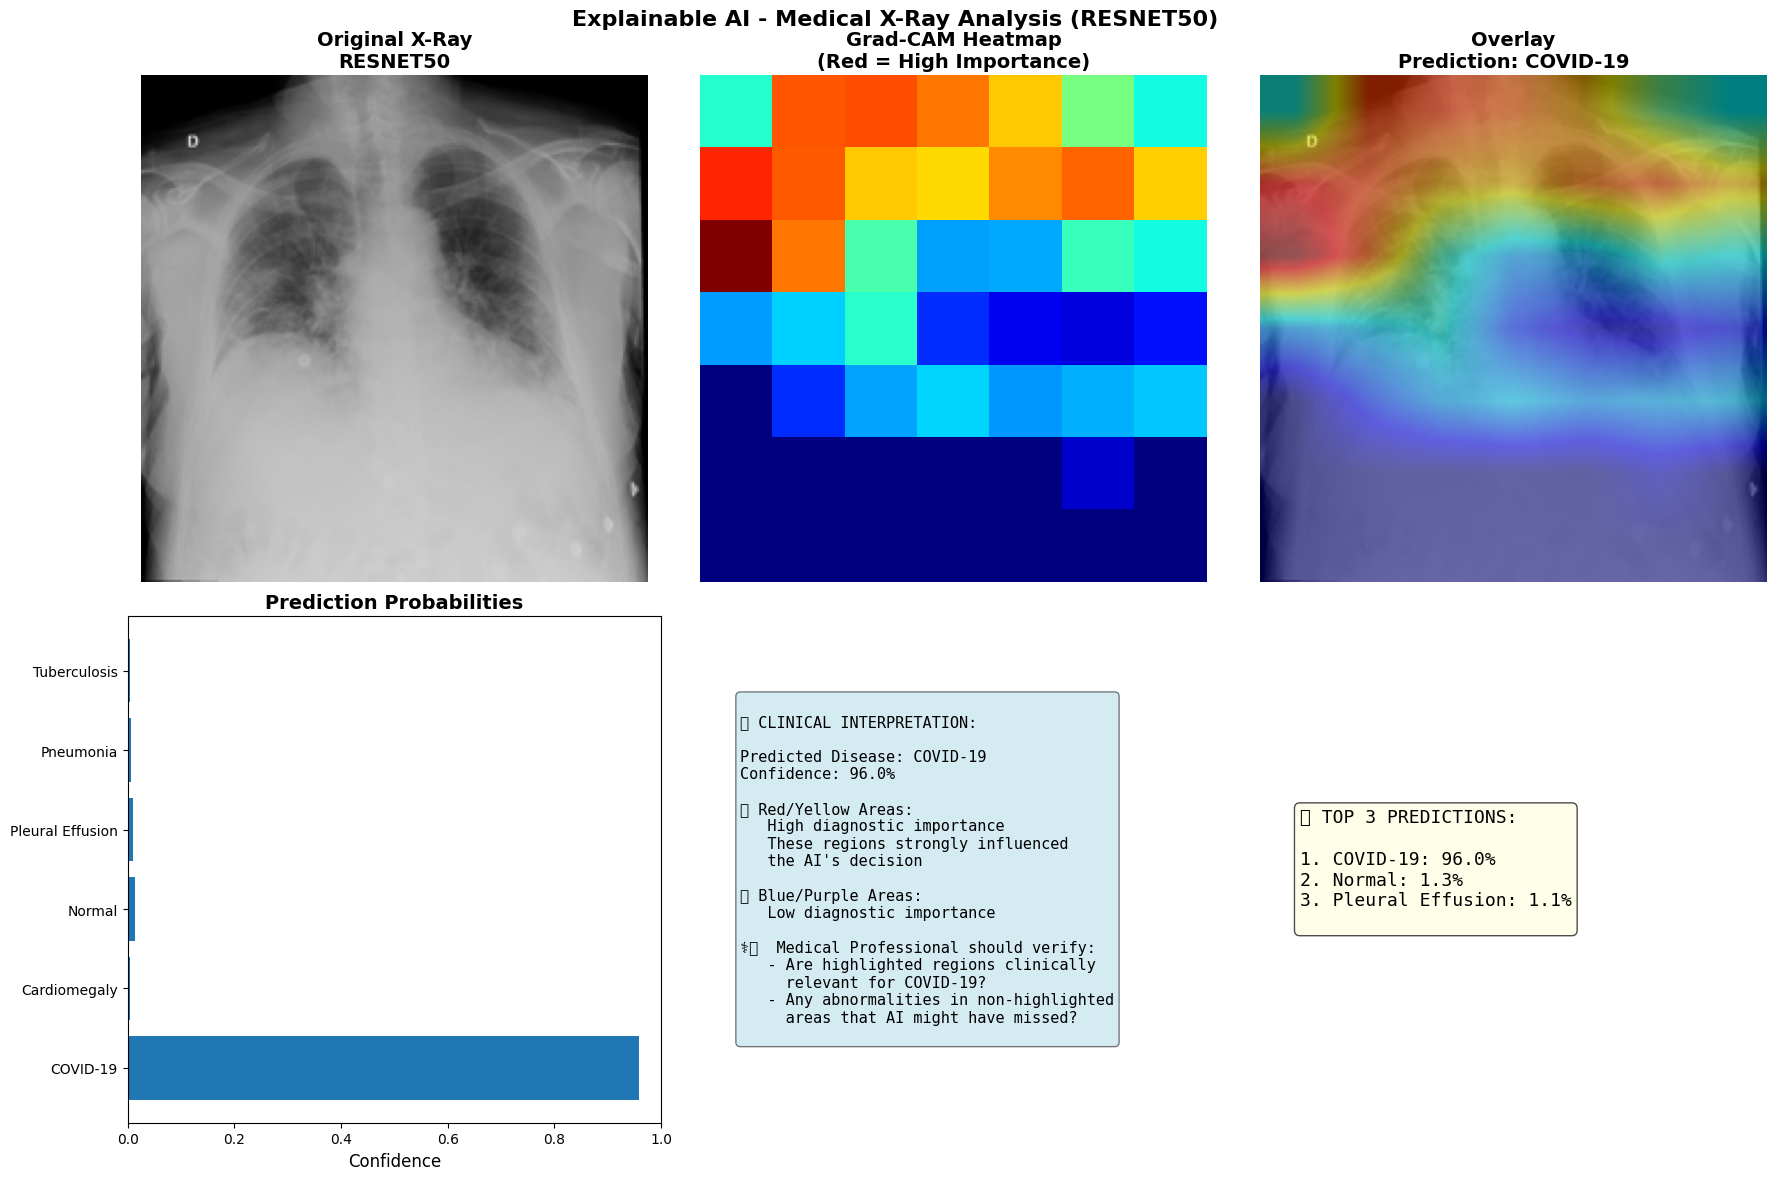


🎯 PREDICTION SUMMARY
Model: RESNET50
Diagnosis: COVID-19
Confidence: 95.95%

Top 3 Differential Diagnoses:
  1. COVID-19: 95.95%
  2. Normal: 1.31%
  3. Pleural Effusion: 1.09%

✅ XAI visualization complete!
📊 Saved as: xai_resnet50.png


In [2]:
# ========================
# QUICK XAI DEMO - COPY THIS TO KAGGLE NOTEBOOK
# ========================

# Install required packages (run once)
# !pip install grad-cam -q

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# ========================
# STEP 1: Choose Your Settings
# ========================
MODEL_TYPE = "resnet50"  # Options: "resnet50", "densenet121", "efficientnet"
MODEL_PATH = "/kaggle/input/resnet-50-v1-weights/best_resnet50.pth"
IMAGE_PATH = "/kaggle/input/covidx-cxr2/train/sub-S326737_ses-E53636_run-1_bp-chest_vp-ap_cr-corrected.png"

# ========================
# STEP 2: Load Model
# ========================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class_names = ['COVID-19', 'Cardiomegaly', 'Normal', 
               'Pleural Effusion', 'Pneumonia', 'Tuberculosis']

def load_model(model_path, model_type):
    n_classes = 6
    
    if model_type == "resnet50":
        model = models.resnet50(weights=None)
        in_features = model.fc.in_features
        model.fc = nn.Sequential(nn.Dropout(0.3), nn.Linear(in_features, n_classes))
        target_layer = model.layer4[-1].conv3
        
    elif model_type == "densenet121":
        model = models.densenet121(weights=None)
        num_features = model.classifier.in_features
        model.classifier = nn.Sequential(nn.Dropout(0.3), nn.Linear(num_features, n_classes))
        target_layer = model.features.denseblock4.denselayer16.conv2
        
    elif model_type == "efficientnet":
        model = models.efficientnet_b4(weights=None)
        num_features = model.classifier[1].in_features
        model.classifier = nn.Sequential(nn.Dropout(0.4), nn.Linear(num_features, n_classes))
        target_layer = model.features[-1][0]
    
    state_dict = torch.load(model_path, map_location=device)
    model.load_state_dict(state_dict)
    model.to(device)
    model.eval()
    
    return model, target_layer

model, target_layer = load_model(MODEL_PATH, MODEL_TYPE)
print(f"✅ {MODEL_TYPE.upper()} loaded successfully!")

# ========================
# STEP 3: Grad-CAM Implementation
# ========================
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        # Use full_backward_hook to avoid warning
        target_layer.register_forward_hook(self.save_activation)
        target_layer.register_full_backward_hook(self.save_gradient)
    
    def save_activation(self, module, input, output):
        self.activations = output.detach()
    
    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0].detach()
    
    def generate(self, input_tensor, target_class=None):
        # Use no_grad for forward pass, then enable for backward
        with torch.set_grad_enabled(True):
            output = self.model(input_tensor)
        
        if target_class is None:
            target_class = output.argmax(dim=1).item()
        
        self.model.zero_grad()
        output[0, target_class].backward()
        
        gradients = self.gradients[0]
        activations = self.activations[0]
        weights = gradients.mean(dim=(1, 2), keepdim=True)
        cam = (weights * activations).sum(dim=0)
        cam = F.relu(cam)
        cam = cam - cam.min()
        cam = cam / (cam.max() + 1e-8)
        
        return cam.cpu().numpy(), target_class, output.detach()

# ========================
# STEP 4: Process Image
# ========================
img_size = 380 if MODEL_TYPE == "efficientnet" else 224
transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

original_image = Image.open(IMAGE_PATH).convert("RGB")
original_np = np.array(original_image.resize((img_size, img_size)))
input_tensor = transform(original_image).unsqueeze(0).to(device)

# ========================
# STEP 5: Generate Visualization
# ========================
gradcam = GradCAM(model, target_layer)
cam, pred_class, output = gradcam.generate(input_tensor)

probs = F.softmax(output, dim=1)[0].detach()
confidence = probs[pred_class].item()

# Overlay heatmap
cam_resized = cv2.resize(cam, (img_size, img_size))
heatmap = cv2.applyColorMap(np.uint8(255 * cam_resized), cv2.COLORMAP_JET)
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
overlay = heatmap * 0.5 + original_np * 0.5
overlay = np.uint8(overlay)

# ========================
# STEP 6: Display Results
# ========================
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Row 1
axes[0, 0].imshow(original_np)
axes[0, 0].set_title(f'Original X-Ray\n{MODEL_TYPE.upper()}', fontsize=14, fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(cam, cmap='jet')
axes[0, 1].set_title('Grad-CAM Heatmap\n(Red = High Importance)', fontsize=14, fontweight='bold')
axes[0, 1].axis('off')

axes[0, 2].imshow(overlay)
axes[0, 2].set_title(f'Overlay\nPrediction: {class_names[pred_class]}', fontsize=14, fontweight='bold')
axes[0, 2].axis('off')

# Row 2
axes[1, 0].barh(class_names, probs.cpu().numpy())
axes[1, 0].set_xlim([0, 1])
axes[1, 0].set_xlabel('Confidence', fontsize=12)
axes[1, 0].set_title('Prediction Probabilities', fontsize=14, fontweight='bold')

# Clinical interpretation
interpretation = f"""
🏥 CLINICAL INTERPRETATION:

Predicted Disease: {class_names[pred_class]}
Confidence: {confidence*100:.1f}%

🔴 Red/Yellow Areas: 
   High diagnostic importance
   These regions strongly influenced
   the AI's decision

🔵 Blue/Purple Areas:
   Low diagnostic importance
   
⚕️  Medical Professional should verify:
   - Are highlighted regions clinically
     relevant for {class_names[pred_class]}?
   - Any abnormalities in non-highlighted
     areas that AI might have missed?
"""
axes[1, 1].text(0.1, 0.5, interpretation, fontsize=11, 
                verticalalignment='center', family='monospace',
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
axes[1, 1].axis('off')

# Top 3 predictions
top3_idx = probs.argsort(descending=True)[:3]
top3_text = "🔝 TOP 3 PREDICTIONS:\n\n"
for i, idx in enumerate(top3_idx, 1):
    top3_text += f"{i}. {class_names[idx]}: {probs[idx]*100:.1f}%\n"

axes[1, 2].text(0.1, 0.5, top3_text, fontsize=13, 
                verticalalignment='center', family='monospace',
                bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))
axes[1, 2].axis('off')

plt.suptitle(f'Explainable AI - Medical X-Ray Analysis ({MODEL_TYPE.upper()})', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'xai_{MODEL_TYPE}.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "="*70)
print(f"🎯 PREDICTION SUMMARY")
print("="*70)
print(f"Model: {MODEL_TYPE.upper()}")
print(f"Diagnosis: {class_names[pred_class]}")
print(f"Confidence: {confidence*100:.2f}%")
print(f"\nTop 3 Differential Diagnoses:")
for i, idx in enumerate(top3_idx, 1):
    print(f"  {i}. {class_names[idx]}: {probs[idx]*100:.2f}%")
print("="*70)

# ========================
# BONUS: Analyze Multiple Images
# ========================
def analyze_test_samples(model, model_type, target_layer, test_df, n_samples=5):
    """Analyze random test samples with XAI"""
    samples = test_df.sample(n_samples, random_state=42)
    
    fig, axes = plt.subplots(n_samples, 4, figsize=(20, 5*n_samples))
    
    for idx, (_, row) in enumerate(samples.iterrows()):
        img_path = row['image_path']
        true_label = row['label']
        
        # Process image
        img_size = 380 if model_type == "efficientnet" else 224
        transform = transforms.Compose([
            transforms.Resize((img_size, img_size)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
        
        original_image = Image.open(img_path).convert("RGB")
        original_np = np.array(original_image.resize((img_size, img_size)))
        input_tensor = transform(original_image).unsqueeze(0).to(device)
        
        # Generate Grad-CAM
        gradcam = GradCAM(model, target_layer)
        cam, pred_class, output = gradcam.generate(input_tensor)
        probs = F.softmax(output, dim=1)[0].detach()
        
        # Create overlay
        cam_resized = cv2.resize(cam, (img_size, img_size))
        heatmap = cv2.applyColorMap(np.uint8(255 * cam_resized), cv2.COLORMAP_JET)
        heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
        overlay = heatmap * 0.5 + original_np * 0.5
        
        # Plot
        axes[idx, 0].imshow(original_np)
        axes[idx, 0].set_title(f'True: {true_label}', fontsize=10)
        axes[idx, 0].axis('off')
        
        axes[idx, 1].imshow(cam, cmap='jet')
        axes[idx, 1].set_title('Grad-CAM', fontsize=10)
        axes[idx, 1].axis('off')
        
        axes[idx, 2].imshow(overlay)
        correct = "✅" if class_names[pred_class] == true_label else "❌"
        axes[idx, 2].set_title(f'{correct} Pred: {class_names[pred_class]}', fontsize=10)
        axes[idx, 2].axis('off')
        
        axes[idx, 3].barh(class_names, probs.cpu().numpy())
        axes[idx, 3].set_xlim([0, 1])
        axes[idx, 3].tick_params(labelsize=8)
    
    plt.suptitle(f'Test Set Analysis - {model_type.upper()}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'test_analysis_{model_type}.png', dpi=150, bbox_inches='tight')
    plt.show()

# Uncomment to analyze test samples
# import pandas as pd
# test_df = pd.read_csv("/kaggle/input/balanced-dataset/test_split.csv")
# analyze_test_samples(model, MODEL_TYPE, target_layer, test_df, n_samples=5)

print("\n✅ XAI visualization complete!")
print("📊 Saved as: xai_{}.png".format(MODEL_TYPE))

## Densenet-121

✅ DENSENET121 loaded successfully!


/tmp/ipykernel_38/1822279767.py:195: UserWarning: Glyph 127973 (\N{HOSPITAL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_38/1822279767.py:195: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_38/1822279767.py:195: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_38/1822279767.py:195: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_38/1822279767.py:195: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_38/1822279767.py:196: UserWarning: Glyph 127973 (\N{HOSPITAL}) missing from current font.
  plt.savefig(f'xai_{MODEL_TYPE}.png', dpi=150, bbox_inches='tight')
/tmp/ipykernel_38/1822279767.py:196: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  plt.savefig(f'xai_{MODEL_TYPE}.p

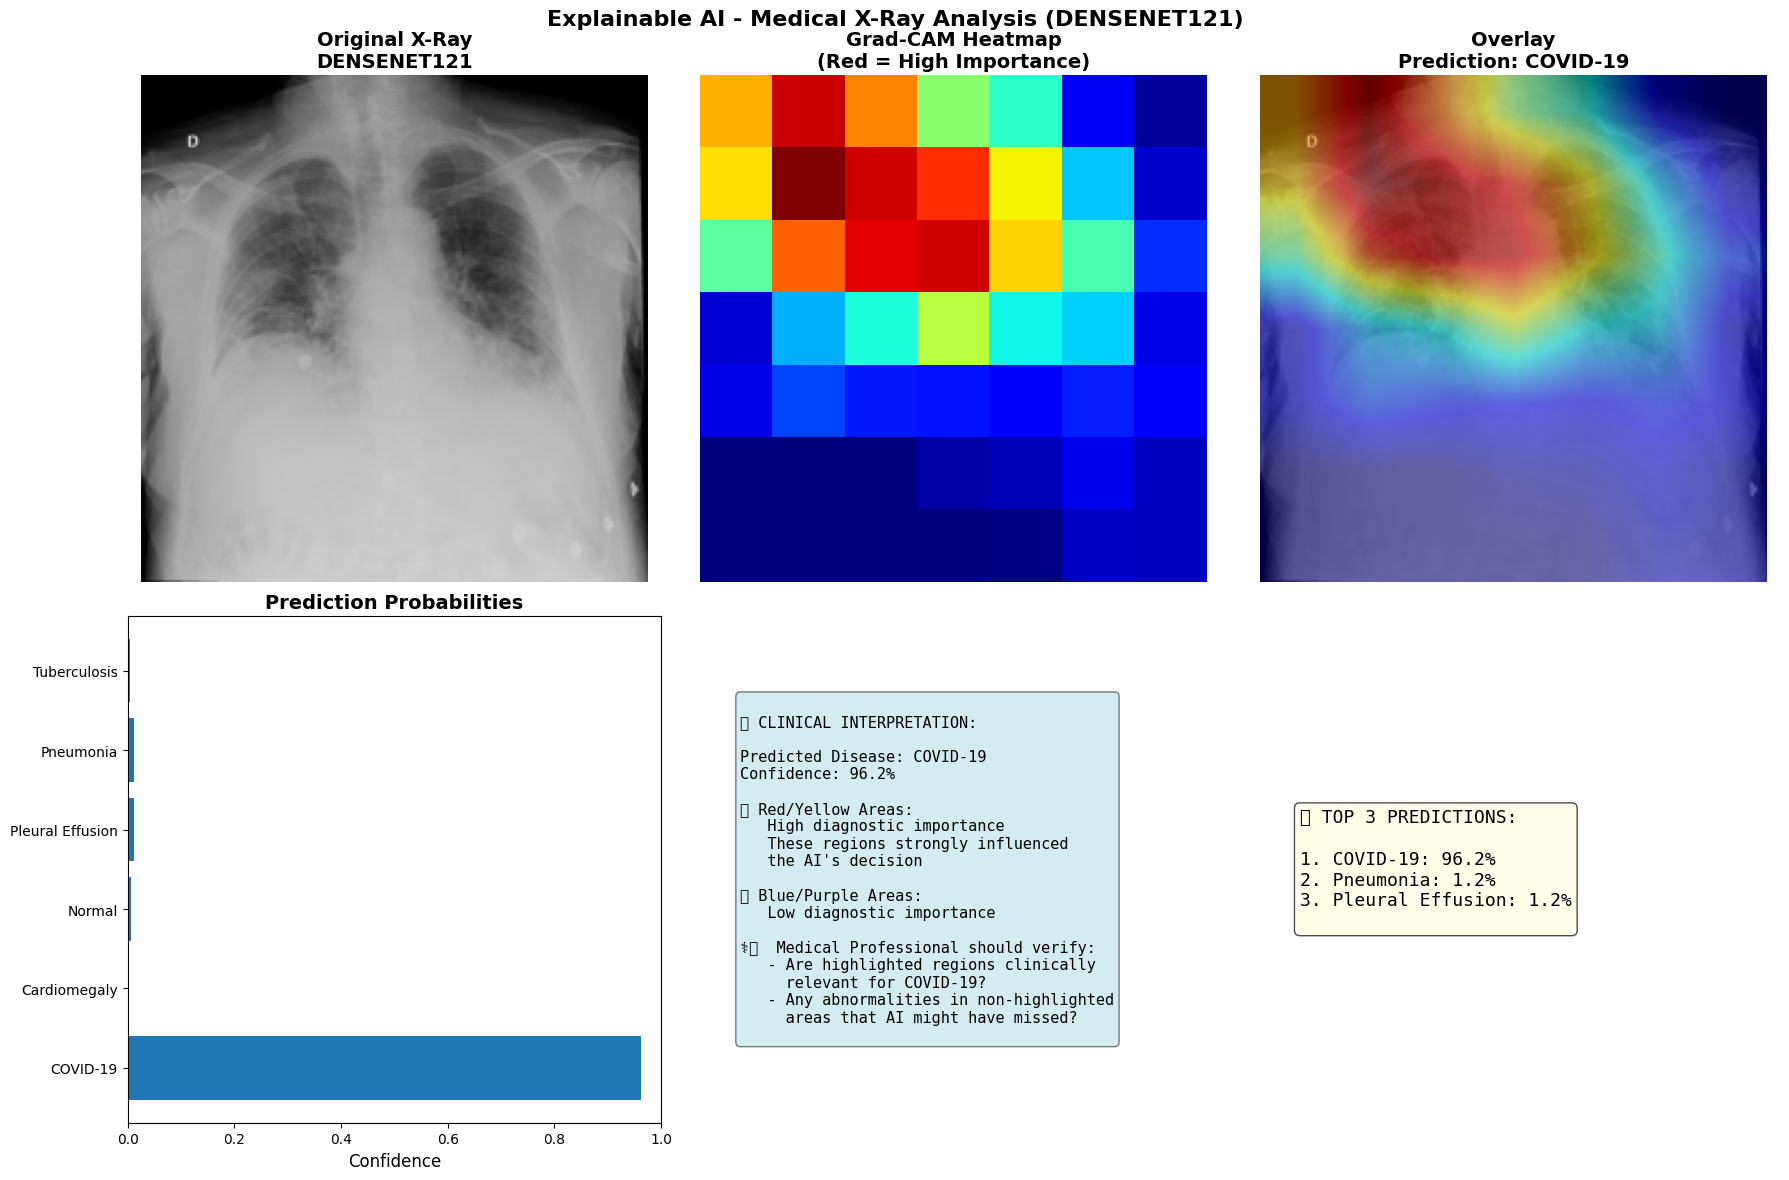


🎯 PREDICTION SUMMARY
Model: DENSENET121
Diagnosis: COVID-19
Confidence: 96.24%

Top 3 Differential Diagnoses:
  1. COVID-19: 96.24%
  2. Pneumonia: 1.19%
  3. Pleural Effusion: 1.18%

✅ XAI visualization complete!
📊 Saved as: xai_densenet121.png


In [4]:
# ========================
# QUICK XAI DEMO - COPY THIS TO KAGGLE NOTEBOOK
# ========================

# Install required packages (run once)
# !pip install grad-cam -q

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# ========================
# STEP 1: Choose Your Settings
# ========================
MODEL_TYPE = "densenet121"  # Options: "resnet50", "densenet121", "efficientnet"
MODEL_PATH = "/kaggle/input/trained-densenet121-weights/best_densenet121.pth"
IMAGE_PATH = "/kaggle/input/covidx-cxr2/train/sub-S326737_ses-E53636_run-1_bp-chest_vp-ap_cr-corrected.png"

# ========================
# STEP 2: Load Model
# ========================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class_names = ['COVID-19', 'Cardiomegaly', 'Normal', 
               'Pleural Effusion', 'Pneumonia', 'Tuberculosis']

def load_model(model_path, model_type):
    n_classes = 6
    
    if model_type == "resnet50":
        model = models.resnet50(weights=None)
        in_features = model.fc.in_features
        model.fc = nn.Sequential(nn.Dropout(0.3), nn.Linear(in_features, n_classes))
        target_layer = model.layer4[-1].conv3
        
    elif model_type == "densenet121":
        model = models.densenet121(weights=None)
        num_features = model.classifier.in_features
        model.classifier = nn.Sequential(nn.Dropout(0.3), nn.Linear(num_features, n_classes))
        target_layer = model.features.denseblock4.denselayer15.conv2
        
    elif model_type == "efficientnet":
        model = models.efficientnet_b4(weights=None)
        num_features = model.classifier[1].in_features
        model.classifier = nn.Sequential(nn.Dropout(0.4), nn.Linear(num_features, n_classes))
        target_layer = model.features[-1][0]
    
    state_dict = torch.load(model_path, map_location=device)
    model.load_state_dict(state_dict)
    model.to(device)
    model.eval()
    
    return model, target_layer

model, target_layer = load_model(MODEL_PATH, MODEL_TYPE)
print(f"✅ {MODEL_TYPE.upper()} loaded successfully!")

# ========================
# STEP 3: Grad-CAM Implementation
# ========================
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        # Use full_backward_hook to avoid warning
        target_layer.register_forward_hook(self.save_activation)
        target_layer.register_full_backward_hook(self.save_gradient)
    
    def save_activation(self, module, input, output):
        self.activations = output.detach()
    
    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0].detach()
    
    def generate(self, input_tensor, target_class=None):
        # Use no_grad for forward pass, then enable for backward
        with torch.set_grad_enabled(True):
            output = self.model(input_tensor)
        
        if target_class is None:
            target_class = output.argmax(dim=1).item()
        
        self.model.zero_grad()
        output[0, target_class].backward()
        
        gradients = self.gradients[0]
        activations = self.activations[0]
        weights = gradients.mean(dim=(1, 2), keepdim=True)
        cam = (weights * activations).sum(dim=0)
        cam = F.relu(cam)
        cam = cam - cam.min()
        cam = cam / (cam.max() + 1e-8)
        
        return cam.cpu().numpy(), target_class, output.detach()

# ========================
# STEP 4: Process Image
# ========================
img_size = 380 if MODEL_TYPE == "efficientnet" else 224
transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

original_image = Image.open(IMAGE_PATH).convert("RGB")
original_np = np.array(original_image.resize((img_size, img_size)))
input_tensor = transform(original_image).unsqueeze(0).to(device)

# ========================
# STEP 5: Generate Visualization
# ========================
gradcam = GradCAM(model, target_layer)
cam, pred_class, output = gradcam.generate(input_tensor)

probs = F.softmax(output, dim=1)[0].detach()
confidence = probs[pred_class].item()

# Overlay heatmap
cam_resized = cv2.resize(cam, (img_size, img_size))
heatmap = cv2.applyColorMap(np.uint8(255 * cam_resized), cv2.COLORMAP_JET)
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
overlay = heatmap * 0.5 + original_np * 0.5
overlay = np.uint8(overlay)

# ========================
# STEP 6: Display Results
# ========================
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Row 1
axes[0, 0].imshow(original_np)
axes[0, 0].set_title(f'Original X-Ray\n{MODEL_TYPE.upper()}', fontsize=14, fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(cam, cmap='jet')
axes[0, 1].set_title('Grad-CAM Heatmap\n(Red = High Importance)', fontsize=14, fontweight='bold')
axes[0, 1].axis('off')

axes[0, 2].imshow(overlay)
axes[0, 2].set_title(f'Overlay\nPrediction: {class_names[pred_class]}', fontsize=14, fontweight='bold')
axes[0, 2].axis('off')

# Row 2
axes[1, 0].barh(class_names, probs.cpu().numpy())
axes[1, 0].set_xlim([0, 1])
axes[1, 0].set_xlabel('Confidence', fontsize=12)
axes[1, 0].set_title('Prediction Probabilities', fontsize=14, fontweight='bold')

# Clinical interpretation
interpretation = f"""
🏥 CLINICAL INTERPRETATION:

Predicted Disease: {class_names[pred_class]}
Confidence: {confidence*100:.1f}%

🔴 Red/Yellow Areas: 
   High diagnostic importance
   These regions strongly influenced
   the AI's decision

🔵 Blue/Purple Areas:
   Low diagnostic importance
   
⚕️  Medical Professional should verify:
   - Are highlighted regions clinically
     relevant for {class_names[pred_class]}?
   - Any abnormalities in non-highlighted
     areas that AI might have missed?
"""
axes[1, 1].text(0.1, 0.5, interpretation, fontsize=11, 
                verticalalignment='center', family='monospace',
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
axes[1, 1].axis('off')

# Top 3 predictions
top3_idx = probs.argsort(descending=True)[:3]
top3_text = "🔝 TOP 3 PREDICTIONS:\n\n"
for i, idx in enumerate(top3_idx, 1):
    top3_text += f"{i}. {class_names[idx]}: {probs[idx]*100:.1f}%\n"

axes[1, 2].text(0.1, 0.5, top3_text, fontsize=13, 
                verticalalignment='center', family='monospace',
                bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))
axes[1, 2].axis('off')

plt.suptitle(f'Explainable AI - Medical X-Ray Analysis ({MODEL_TYPE.upper()})', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'xai_{MODEL_TYPE}.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "="*70)
print(f"🎯 PREDICTION SUMMARY")
print("="*70)
print(f"Model: {MODEL_TYPE.upper()}")
print(f"Diagnosis: {class_names[pred_class]}")
print(f"Confidence: {confidence*100:.2f}%")
print(f"\nTop 3 Differential Diagnoses:")
for i, idx in enumerate(top3_idx, 1):
    print(f"  {i}. {class_names[idx]}: {probs[idx]*100:.2f}%")
print("="*70)

# ========================
# BONUS: Analyze Multiple Images
# ========================
def analyze_test_samples(model, model_type, target_layer, test_df, n_samples=5):
    """Analyze random test samples with XAI"""
    samples = test_df.sample(n_samples, random_state=42)
    
    fig, axes = plt.subplots(n_samples, 4, figsize=(20, 5*n_samples))
    
    for idx, (_, row) in enumerate(samples.iterrows()):
        img_path = row['image_path']
        true_label = row['label']
        
        # Process image
        img_size = 380 if model_type == "efficientnet" else 224
        transform = transforms.Compose([
            transforms.Resize((img_size, img_size)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
        
        original_image = Image.open(img_path).convert("RGB")
        original_np = np.array(original_image.resize((img_size, img_size)))
        input_tensor = transform(original_image).unsqueeze(0).to(device)
        
        # Generate Grad-CAM
        gradcam = GradCAM(model, target_layer)
        cam, pred_class, output = gradcam.generate(input_tensor)
        probs = F.softmax(output, dim=1)[0].detach()
        
        # Create overlay
        cam_resized = cv2.resize(cam, (img_size, img_size))
        heatmap = cv2.applyColorMap(np.uint8(255 * cam_resized), cv2.COLORMAP_JET)
        heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
        overlay = heatmap * 0.5 + original_np * 0.5
        
        # Plot
        axes[idx, 0].imshow(original_np)
        axes[idx, 0].set_title(f'True: {true_label}', fontsize=10)
        axes[idx, 0].axis('off')
        
        axes[idx, 1].imshow(cam, cmap='jet')
        axes[idx, 1].set_title('Grad-CAM', fontsize=10)
        axes[idx, 1].axis('off')
        
        axes[idx, 2].imshow(overlay)
        correct = "✅" if class_names[pred_class] == true_label else "❌"
        axes[idx, 2].set_title(f'{correct} Pred: {class_names[pred_class]}', fontsize=10)
        axes[idx, 2].axis('off')
        
        axes[idx, 3].barh(class_names, probs.cpu().numpy())
        axes[idx, 3].set_xlim([0, 1])
        axes[idx, 3].tick_params(labelsize=8)
    
    plt.suptitle(f'Test Set Analysis - {model_type.upper()}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'test_analysis_{model_type}.png', dpi=150, bbox_inches='tight')
    plt.show()

# Uncomment to analyze test samples
# import pandas as pd
# test_df = pd.read_csv("/kaggle/input/balanced-dataset/test_split.csv")
# analyze_test_samples(model, MODEL_TYPE, target_layer, test_df, n_samples=5)

print("\n✅ XAI visualization complete!")
print("📊 Saved as: xai_{}.png".format(MODEL_TYPE))

## Efficient-net

In [4]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.0 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0

EFFICIENTNET XAI VISUALIZATION
✅ Model loaded
✅ Image processed: shape=(380, 380, 3)
✅ Prediction: COVID-19 (94.41%)

Layer Analysis:
----------------------------------------------------------------------
features[8] (Last)   | Active: 1.3% | Mean: 0.010 | Std: 0.069 | Score: 0.001
features[7]          | Active: 30.7% | Mean: 0.104 | Std: 0.161 | Score: 0.049
features[6]          | Active: 3.5% | Mean: 0.024 | Std: 0.098 | Score: 0.003
features[5]          | Active: 21.8% | Mean: 0.076 | Std: 0.130 | Score: 0.028

✅ Best layer: features[7] (score: 0.049)


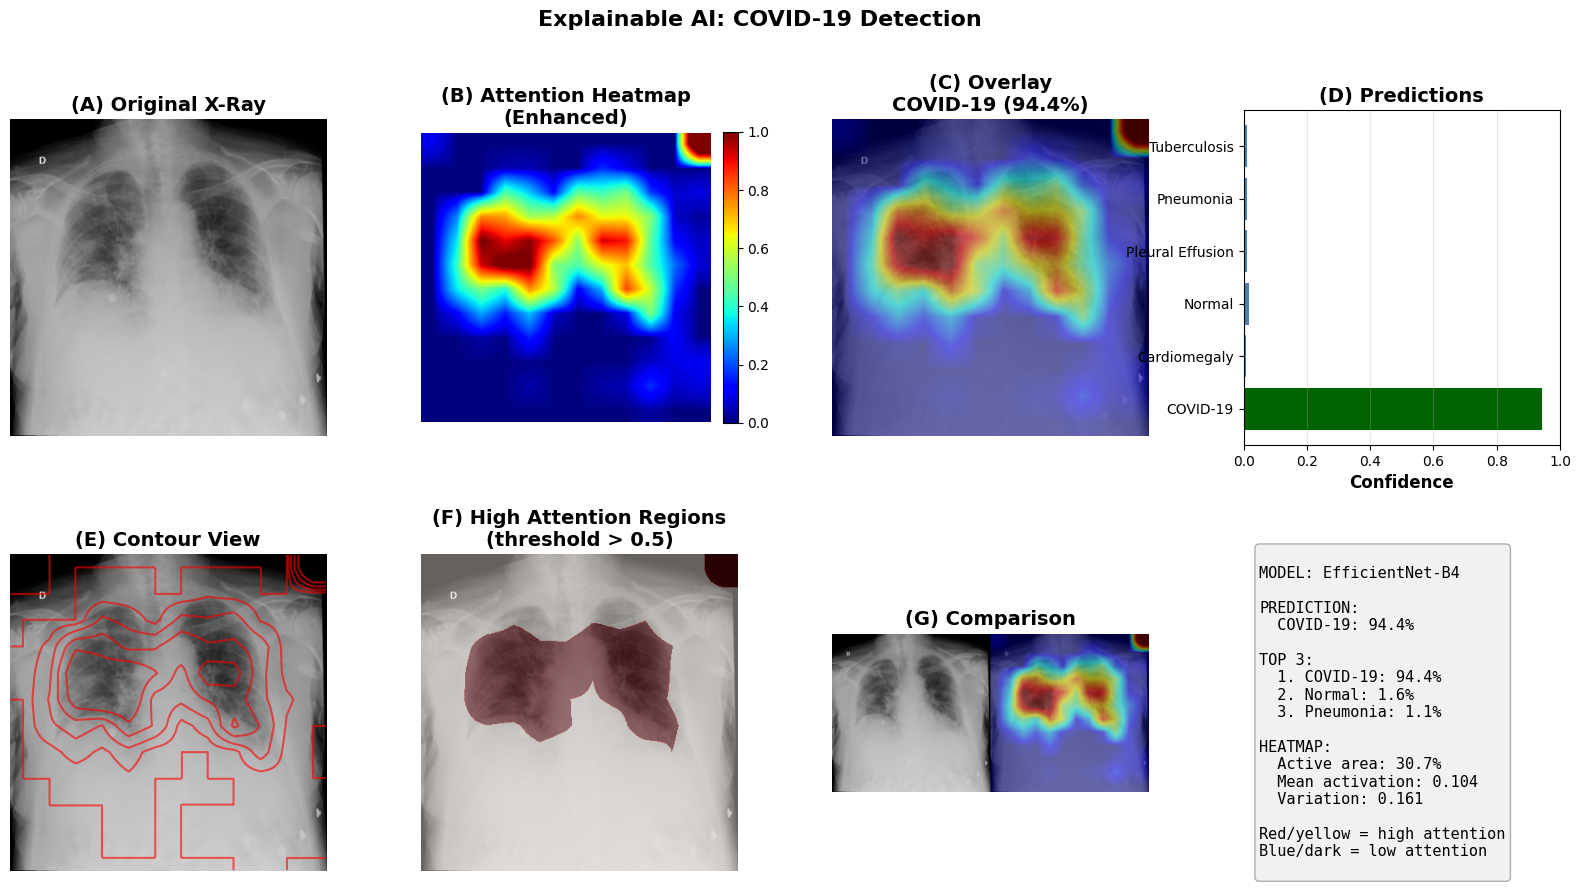


SUMMARY
✅ Visualization saved: xai_efficientnet_clean.png
✅ Prediction: COVID-19 (94.41%)
✅ Active attention area: 30.7%


In [3]:
"""
Cleaned EfficientNet XAI Visualization
Fixes: quarter circle artifact, redundant code, better heatmap processing
"""

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

from pytorch_grad_cam import GradCAM, GradCAMPlusPlus, LayerCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

# ========================
# CONFIGURATION
# ========================
MODEL_PATH = "/kaggle/input/trained-efficient-net-weights/best_efficientnet.pth"
IMAGE_PATH = "/kaggle/input/covidx-cxr2/train/sub-S326737_ses-E53636_run-1_bp-chest_vp-ap_cr-corrected.png"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class_names = ['COVID-19', 'Cardiomegaly', 'Normal', 
               'Pleural Effusion', 'Pneumonia', 'Tuberculosis']
IMG_SIZE = 380

print("="*70)
print("EFFICIENTNET XAI VISUALIZATION")
print("="*70)

# ========================
# LOAD MODEL
# ========================
def load_model():
    model = models.efficientnet_b4(weights=None)
    num_features = model.classifier[1].in_features
    model.classifier = nn.Sequential(
        nn.Dropout(0.4),
        nn.Linear(num_features, 6)
    )
    state_dict = torch.load(MODEL_PATH, map_location=device)
    model.load_state_dict(state_dict)
    model.to(device)
    model.eval()
    return model

model = load_model()
print("✅ Model loaded")

# ========================
# PROCESS IMAGE - FIX FOR QUARTER CIRCLE
# ========================
def prepare_image(image_path, size=IMG_SIZE):
    """Prepare image ensuring proper dimensions"""
    original_pil = Image.open(image_path).convert("RGB")
    
    # Resize for model
    resized_pil = original_pil.resize((size, size), Image.Resampling.BILINEAR)
    
    # Create numpy array for visualization (0-1 range)
    img_np = np.array(resized_pil).astype(np.float32) / 255.0
    
    # Create tensor for model
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    img_tensor = transform(resized_pil).unsqueeze(0).to(device)
    
    return img_np, img_tensor

img_rgb, input_tensor = prepare_image(IMAGE_PATH)
print(f"✅ Image processed: shape={img_rgb.shape}")

# ========================
# GET PREDICTION
# ========================
with torch.no_grad():
    output = model(input_tensor)
    probs = F.softmax(output, dim=1)[0]
    pred_class = probs.argmax().item()
    confidence = probs[pred_class].item()

print(f"✅ Prediction: {class_names[pred_class]} ({confidence*100:.2f}%)")

# ========================
# FIND BEST LAYER
# ========================
def evaluate_layers(model, input_tensor, pred_class):
    """Test multiple layers and find the best one"""
    layer_configs = [
        ("features[8] (Last)", model.features[8]),
        ("features[7]", model.features[7]),
        ("features[6]", model.features[6]),
        ("features[5]", model.features[5]),
    ]
    
    targets = [ClassifierOutputTarget(pred_class)]
    results = {}
    
    print("\nLayer Analysis:")
    print("-" * 70)
    
    for name, target_layer in layer_configs:
        try:
            cam = LayerCAM(model=model, target_layers=[target_layer])
            grayscale_cam = cam(input_tensor=input_tensor, targets=targets)[0, :]
            
            # Calculate metrics
            active_ratio = (grayscale_cam > 0.1).mean()
            mean_val = grayscale_cam.mean()
            std_val = grayscale_cam.std()
            
            score = active_ratio * std_val  # Balance coverage and variation
            
            results[name] = {
                'cam': grayscale_cam,
                'layer': target_layer,
                'score': score,
                'active_ratio': active_ratio,
                'mean': mean_val,
                'std': std_val
            }
            
            print(f"{name:20s} | Active: {active_ratio:.1%} | "
                  f"Mean: {mean_val:.3f} | Std: {std_val:.3f} | Score: {score:.3f}")
            
        except Exception as e:
            print(f"{name:20s} | ❌ Failed: {str(e)[:50]}")
    
    # Find best layer by score
    best_name = max(results.keys(), key=lambda x: results[x]['score'])
    print(f"\n✅ Best layer: {best_name} (score: {results[best_name]['score']:.3f})")
    
    return results[best_name]

best_result = evaluate_layers(model, input_tensor, pred_class)

# ========================
# ENHANCED HEATMAP PROCESSING - FIXES ARTIFACTS
# ========================
def enhance_heatmap(heatmap, percentile_low=20, percentile_high=99):
    """
    Enhanced heatmap processing to remove artifacts
    """
    # Remove low-value noise
    threshold_low = np.percentile(heatmap, percentile_low)
    threshold_high = np.percentile(heatmap, percentile_high)
    
    enhanced = heatmap.copy()
    enhanced[enhanced < threshold_low] = 0
    
    # Clip extreme values (helps with artifacts)
    enhanced = np.clip(enhanced, 0, threshold_high)
    
    # Normalize to 0-1
    if enhanced.max() > 0:
        enhanced = (enhanced - enhanced.min()) / (enhanced.max() - enhanced.min())
    
    # Apply gamma correction for better visibility
    enhanced = np.power(enhanced, 0.7)
    
    return enhanced

heatmap_enhanced = enhance_heatmap(best_result['cam'])

# ========================
# CREATE OVERLAY - FIX FOR PROPER ALIGNMENT
# ========================
def create_overlay(img_rgb, heatmap, alpha=0.5):
    """Create overlay ensuring proper size alignment"""
    # Ensure heatmap is same size as image
    if heatmap.shape != img_rgb.shape[:2]:
        heatmap = cv2.resize(heatmap, (img_rgb.shape[1], img_rgb.shape[0]))
    
    # Create colored heatmap
    heatmap_colored = cv2.applyColorMap(
        (heatmap * 255).astype(np.uint8), 
        cv2.COLORMAP_JET
    )
    heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB) / 255.0
    
    # Blend
    overlay = heatmap_colored * alpha + img_rgb * (1 - alpha)
    overlay = np.clip(overlay, 0, 1)
    
    return overlay

overlay = create_overlay(img_rgb, heatmap_enhanced)

# ========================
# CLEAN VISUALIZATION
# ========================
fig = plt.figure(figsize=(20, 10))
gs = fig.add_gridspec(2, 4, hspace=0.3, wspace=0.3)

# Row 1: Main visualizations
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(img_rgb)
ax1.set_title('(A) Original X-Ray', fontsize=14, fontweight='bold')
ax1.axis('off')

ax2 = fig.add_subplot(gs[0, 1])
im = ax2.imshow(heatmap_enhanced, cmap='jet', interpolation='bilinear')
ax2.set_title('(B) Attention Heatmap\n(Enhanced)', fontsize=14, fontweight='bold')
ax2.axis('off')
plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)

ax3 = fig.add_subplot(gs[0, 2])
ax3.imshow(overlay)
ax3.set_title(f'(C) Overlay\n{class_names[pred_class]} ({confidence*100:.1f}%)', 
              fontsize=14, fontweight='bold')
ax3.axis('off')

ax4 = fig.add_subplot(gs[0, 3])
colors = ['darkgreen' if i == pred_class else 'steelblue' for i in range(len(class_names))]
ax4.barh(class_names, probs.cpu().numpy(), color=colors)
ax4.set_xlim([0, 1])
ax4.set_xlabel('Confidence', fontsize=12, fontweight='bold')
ax4.set_title('(D) Predictions', fontsize=14, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

# Row 2: Additional views
ax5 = fig.add_subplot(gs[1, 0])
ax5.imshow(img_rgb)
ax5.contour(heatmap_enhanced, levels=5, colors='red', linewidths=1.5, alpha=0.6)
ax5.set_title('(E) Contour View', fontsize=14, fontweight='bold')
ax5.axis('off')

ax6 = fig.add_subplot(gs[1, 1])
# Thresholded view
threshold_mask = heatmap_enhanced > 0.5
ax6.imshow(img_rgb)
ax6.imshow(threshold_mask, cmap='Reds', alpha=0.4)
ax6.set_title('(F) High Attention Regions\n(threshold > 0.5)', fontsize=14, fontweight='bold')
ax6.axis('off')

ax7 = fig.add_subplot(gs[1, 2])
# Side-by-side
combined = np.hstack([img_rgb, overlay])
ax7.imshow(combined)
ax7.set_title('(G) Comparison', fontsize=14, fontweight='bold')
ax7.axis('off')

# Statistics box
ax8 = fig.add_subplot(gs[1, 3])
top3_idx = probs.argsort(descending=True)[:3]
stats_text = f"""
MODEL: EfficientNet-B4

PREDICTION:
  {class_names[pred_class]}: {confidence*100:.1f}%

TOP 3:
"""
for i, idx in enumerate(top3_idx, 1):
    stats_text += f"  {i}. {class_names[idx]}: {probs[idx]*100:.1f}%\n"

stats_text += f"""
HEATMAP:
  Active area: {best_result['active_ratio']:.1%}
  Mean activation: {best_result['mean']:.3f}
  Variation: {best_result['std']:.3f}

Red/yellow = high attention
Blue/dark = low attention
"""

ax8.text(0.05, 0.5, stats_text, fontsize=11,
         verticalalignment='center', family='monospace',
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.3))
ax8.axis('off')

plt.suptitle(f'Explainable AI: {class_names[pred_class]} Detection', 
             fontsize=16, fontweight='bold')
plt.savefig('xai_efficientnet_clean.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n" + "="*70)
print("SUMMARY")
print("="*70)
print(f"✅ Visualization saved: xai_efficientnet_clean.png")
print(f"✅ Prediction: {class_names[pred_class]} ({confidence*100:.2f}%)")
print(f"✅ Active attention area: {best_result['active_ratio']:.1%}")
print("="*70)

EFFICIENTNET XAI VISUALIZATION
✅ Model loaded
✅ Image processed: shape=(380, 380, 3)
✅ Prediction: Normal (77.77%)

Layer Analysis:
----------------------------------------------------------------------
features[8] (Last)   | Active: 18.3% | Mean: 0.056 | Std: 0.120 | Score: 0.022
features[7]          | Active: 28.5% | Mean: 0.121 | Std: 0.206 | Score: 0.059
features[6]          | Active: 18.3% | Mean: 0.057 | Std: 0.117 | Score: 0.021
features[5]          | Active: 14.3% | Mean: 0.047 | Std: 0.086 | Score: 0.012

✅ Best layer: features[7] (score: 0.059)


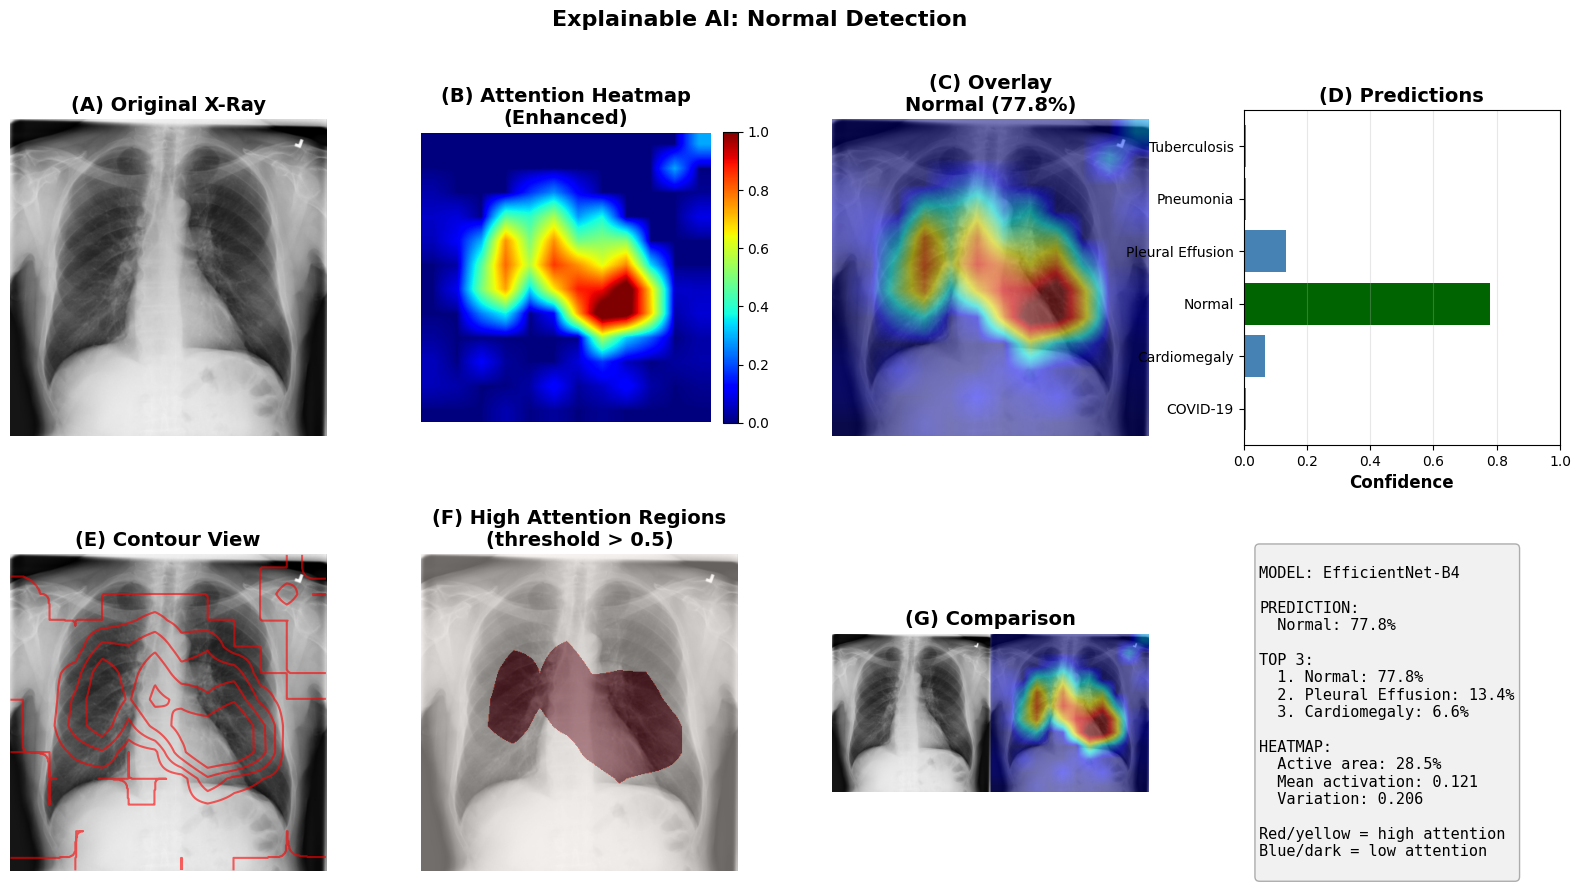


SUMMARY
✅ Visualization saved: xai_efficientnet_clean.png
✅ Prediction: Normal (77.77%)
✅ Active attention area: 28.5%


In [20]:
"""
Cleaned EfficientNet XAI Visualization
Fixes: quarter circle artifact, redundant code, better heatmap processing
"""

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

from pytorch_grad_cam import GradCAM, GradCAMPlusPlus, LayerCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

# ========================
# CONFIGURATION
# ========================
MODEL_PATH = "/kaggle/input/trained-efficient-net-weights/best_efficientnet.pth"
IMAGE_PATH = "/kaggle/input/covidx-cxr2/train/fd060e38-c89d-4bef-b9aa-427a97a1cf9a.png"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class_names = ['COVID-19', 'Cardiomegaly', 'Normal', 
               'Pleural Effusion', 'Pneumonia', 'Tuberculosis']
IMG_SIZE = 380

print("="*70)
print("EFFICIENTNET XAI VISUALIZATION")
print("="*70)

# ========================
# LOAD MODEL
# ========================
def load_model():
    model = models.efficientnet_b4(weights=None)
    num_features = model.classifier[1].in_features
    model.classifier = nn.Sequential(
        nn.Dropout(0.4),
        nn.Linear(num_features, 6)
    )
    state_dict = torch.load(MODEL_PATH, map_location=device)
    model.load_state_dict(state_dict)
    model.to(device)
    model.eval()
    return model

model = load_model()
print("✅ Model loaded")

# ========================
# PROCESS IMAGE - FIX FOR QUARTER CIRCLE
# ========================
def prepare_image(image_path, size=IMG_SIZE):
    """Prepare image ensuring proper dimensions"""
    original_pil = Image.open(image_path).convert("RGB")
    
    # Resize for model
    resized_pil = original_pil.resize((size, size), Image.Resampling.BILINEAR)
    
    # Create numpy array for visualization (0-1 range)
    img_np = np.array(resized_pil).astype(np.float32) / 255.0
    
    # Create tensor for model
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    img_tensor = transform(resized_pil).unsqueeze(0).to(device)
    
    return img_np, img_tensor

img_rgb, input_tensor = prepare_image(IMAGE_PATH)
print(f"✅ Image processed: shape={img_rgb.shape}")

# ========================
# GET PREDICTION
# ========================
with torch.no_grad():
    output = model(input_tensor)
    probs = F.softmax(output, dim=1)[0]
    pred_class = probs.argmax().item()
    confidence = probs[pred_class].item()

print(f"✅ Prediction: {class_names[pred_class]} ({confidence*100:.2f}%)")

# ========================
# FIND BEST LAYER
# ========================
def evaluate_layers(model, input_tensor, pred_class):
    """Test multiple layers and find the best one"""
    layer_configs = [
        ("features[8] (Last)", model.features[8]),
        ("features[7]", model.features[7]),
        ("features[6]", model.features[6]),
        ("features[5]", model.features[5]),
    ]
    
    targets = [ClassifierOutputTarget(pred_class)]
    results = {}
    
    print("\nLayer Analysis:")
    print("-" * 70)
    
    for name, target_layer in layer_configs:
        try:
            cam = LayerCAM(model=model, target_layers=[target_layer])
            grayscale_cam = cam(input_tensor=input_tensor, targets=targets)[0, :]
            
            # Calculate metrics
            active_ratio = (grayscale_cam > 0.1).mean()
            mean_val = grayscale_cam.mean()
            std_val = grayscale_cam.std()
            
            score = active_ratio * std_val  # Balance coverage and variation
            
            results[name] = {
                'cam': grayscale_cam,
                'layer': target_layer,
                'score': score,
                'active_ratio': active_ratio,
                'mean': mean_val,
                'std': std_val
            }
            
            print(f"{name:20s} | Active: {active_ratio:.1%} | "
                  f"Mean: {mean_val:.3f} | Std: {std_val:.3f} | Score: {score:.3f}")
            
        except Exception as e:
            print(f"{name:20s} | ❌ Failed: {str(e)[:50]}")
    
    # Find best layer by score
    best_name = max(results.keys(), key=lambda x: results[x]['score'])
    print(f"\n✅ Best layer: {best_name} (score: {results[best_name]['score']:.3f})")
    
    return results[best_name]

best_result = evaluate_layers(model, input_tensor, pred_class)

# ========================
# ENHANCED HEATMAP PROCESSING - FIXES ARTIFACTS
# ========================
def enhance_heatmap(heatmap, percentile_low=20, percentile_high=99):
    """
    Enhanced heatmap processing to remove artifacts
    """
    # Remove low-value noise
    threshold_low = np.percentile(heatmap, percentile_low)
    threshold_high = np.percentile(heatmap, percentile_high)
    
    enhanced = heatmap.copy()
    enhanced[enhanced < threshold_low] = 0
    
    # Clip extreme values (helps with artifacts)
    enhanced = np.clip(enhanced, 0, threshold_high)
    
    # Normalize to 0-1
    if enhanced.max() > 0:
        enhanced = (enhanced - enhanced.min()) / (enhanced.max() - enhanced.min())
    
    # Apply gamma correction for better visibility
    enhanced = np.power(enhanced, 0.7)
    
    return enhanced

heatmap_enhanced = enhance_heatmap(best_result['cam'])

# ========================
# CREATE OVERLAY - FIX FOR PROPER ALIGNMENT
# ========================
def create_overlay(img_rgb, heatmap, alpha=0.5):
    """Create overlay ensuring proper size alignment"""
    # Ensure heatmap is same size as image
    if heatmap.shape != img_rgb.shape[:2]:
        heatmap = cv2.resize(heatmap, (img_rgb.shape[1], img_rgb.shape[0]))
    
    # Create colored heatmap
    heatmap_colored = cv2.applyColorMap(
        (heatmap * 255).astype(np.uint8), 
        cv2.COLORMAP_JET
    )
    heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB) / 255.0
    
    # Blend
    overlay = heatmap_colored * alpha + img_rgb * (1 - alpha)
    overlay = np.clip(overlay, 0, 1)
    
    return overlay

overlay = create_overlay(img_rgb, heatmap_enhanced)

# ========================
# CLEAN VISUALIZATION
# ========================
fig = plt.figure(figsize=(20, 10))
gs = fig.add_gridspec(2, 4, hspace=0.3, wspace=0.3)

# Row 1: Main visualizations
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(img_rgb)
ax1.set_title('(A) Original X-Ray', fontsize=14, fontweight='bold')
ax1.axis('off')

ax2 = fig.add_subplot(gs[0, 1])
im = ax2.imshow(heatmap_enhanced, cmap='jet', interpolation='bilinear')
ax2.set_title('(B) Attention Heatmap\n(Enhanced)', fontsize=14, fontweight='bold')
ax2.axis('off')
plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)

ax3 = fig.add_subplot(gs[0, 2])
ax3.imshow(overlay)
ax3.set_title(f'(C) Overlay\n{class_names[pred_class]} ({confidence*100:.1f}%)', 
              fontsize=14, fontweight='bold')
ax3.axis('off')

ax4 = fig.add_subplot(gs[0, 3])
colors = ['darkgreen' if i == pred_class else 'steelblue' for i in range(len(class_names))]
ax4.barh(class_names, probs.cpu().numpy(), color=colors)
ax4.set_xlim([0, 1])
ax4.set_xlabel('Confidence', fontsize=12, fontweight='bold')
ax4.set_title('(D) Predictions', fontsize=14, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

# Row 2: Additional views
ax5 = fig.add_subplot(gs[1, 0])
ax5.imshow(img_rgb)
ax5.contour(heatmap_enhanced, levels=5, colors='red', linewidths=1.5, alpha=0.6)
ax5.set_title('(E) Contour View', fontsize=14, fontweight='bold')
ax5.axis('off')

ax6 = fig.add_subplot(gs[1, 1])
# Thresholded view
threshold_mask = heatmap_enhanced > 0.5
ax6.imshow(img_rgb)
ax6.imshow(threshold_mask, cmap='Reds', alpha=0.4)
ax6.set_title('(F) High Attention Regions\n(threshold > 0.5)', fontsize=14, fontweight='bold')
ax6.axis('off')

ax7 = fig.add_subplot(gs[1, 2])
# Side-by-side
combined = np.hstack([img_rgb, overlay])
ax7.imshow(combined)
ax7.set_title('(G) Comparison', fontsize=14, fontweight='bold')
ax7.axis('off')

# Statistics box
ax8 = fig.add_subplot(gs[1, 3])
top3_idx = probs.argsort(descending=True)[:3]
stats_text = f"""
MODEL: EfficientNet-B4

PREDICTION:
  {class_names[pred_class]}: {confidence*100:.1f}%

TOP 3:
"""
for i, idx in enumerate(top3_idx, 1):
    stats_text += f"  {i}. {class_names[idx]}: {probs[idx]*100:.1f}%\n"

stats_text += f"""
HEATMAP:
  Active area: {best_result['active_ratio']:.1%}
  Mean activation: {best_result['mean']:.3f}
  Variation: {best_result['std']:.3f}

Red/yellow = high attention
Blue/dark = low attention
"""

ax8.text(0.05, 0.5, stats_text, fontsize=11,
         verticalalignment='center', family='monospace',
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.3))
ax8.axis('off')

plt.suptitle(f'Explainable AI: {class_names[pred_class]} Detection', 
             fontsize=16, fontweight='bold')
plt.savefig('xai_efficientnet_clean.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n" + "="*70)
print("SUMMARY")
print("="*70)
print(f"✅ Visualization saved: xai_efficientnet_clean.png")
print(f"✅ Prediction: {class_names[pred_class]} ({confidence*100:.2f}%)")
print(f"✅ Active attention area: {best_result['active_ratio']:.1%}")
print("="*70)